# Projet 

On s'intéresse à la base de données sur les livres d'Amazon. La base de donnée est composée de 550 livres vendu entre 2009 et 2019.

On va suivre la démarche scientifiques suivantes : question -> hypothèse -> expérience/validation expérimentale -> Observations et Conclusions

- Question : Quelles est la différence entre les livres de fiction et les livres qui ne sont pas de la fition ? 

- Hypothèse : On suppose que qu'il y a des différences entre les livres de fiction et les livres qui ne sont pas de fiction.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Johanne/Documents/Cours Master/M2/Statistique en grande dimension/Fiche Célisse/Données/AP/bestsellers with categories.csv")

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.keys()

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

Création de la variable Genre2, pour avoir la variable de Genre en numérique. On a des 0 pour les livres qui ne sont pas des fictions et des 1 pour les livres de fiction.

In [6]:
df['Genre2']=0
for i in range(len(df['Genre'])):
    if df['Genre'][i] == "Fiction" :
        df['Genre2'][i]= 1
    else :
        df['Genre2'][i]=0

C:\Users\Johanne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Johanne\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
#on vérifie s'il n'y pas des valeurs nulles dans notre dataframe.
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
Genre2         0
dtype: int64

On regarde les statistiques descriptives de la base initiale df.

In [8]:
df.describe()

,User Rating,Reviews,Price,Year,Genre2
count,550.000000,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000,0.436364
std,0.226980,11731.132017,10.842262,3.165156,0.496385
min,3.300000,37.000000,0.000000,2009.000000,0.000000
25%,4.500000,4058.000000,7.000000,2011.000000,0.000000
50%,4.700000,8580.000000,11.000000,2014.000000,0.000000
75%,4.800000,17253.250000,16.000000,2017.000000,1.000000
max,4.900000,87841.000000,105.000000,2019.000000,1.000000


Création de deux tables : df_nonfiction et df_fiction.

In [9]:
df_nonfiction = df.copy()
for i in range(len(df['Genre'])-1,-1,-1):
    if df['Genre'][i] == "Fiction" :
        df_nonfiction.drop([i],inplace=True)

In [10]:
df_fiction = df.copy()
for i in range(len(df['Genre'])-1,-1,-1):
    if df['Genre'][i] == "Non Fiction" :
        df_fiction.drop([i],inplace=True)

On s'intéresse maintenant à la variable Genre.

In [11]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

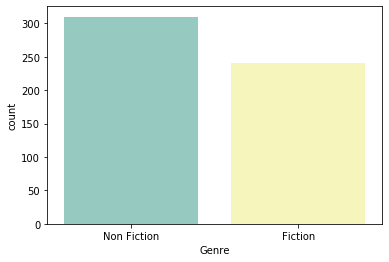

In [12]:
sns.countplot('Genre', data=df, palette='Set3')
plt.show()

In [13]:
df.groupby(['Genre'], as_index=False)['Price'].mean()

,Genre,Price
0,Fiction,10.850000
1,Non Fiction,14.841935


In [14]:
df.groupby(['Genre'])['Reviews'].mean()

Genre
Fiction        15683.791667
Non Fiction     9065.145161
Name: Reviews, dtype: float64

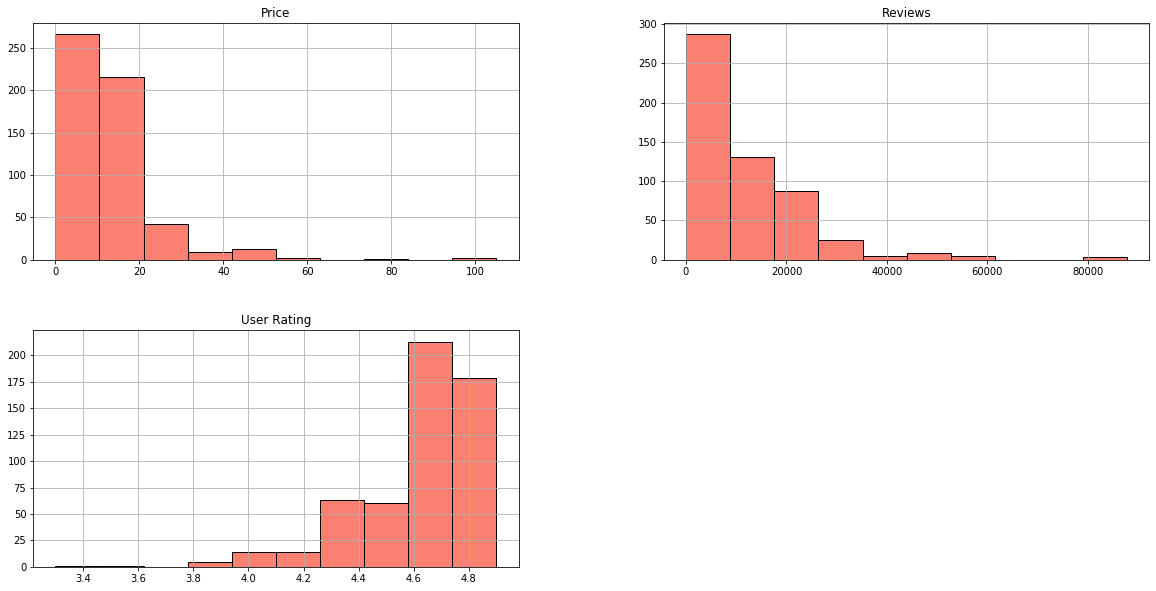

,User Rating,User Rating Count,Reviews,Reviews Count,Price,Price Count
0,"(3.298, 3.46]",1,"(-50.804, 8817.4]",287,"(-0.105, 10.5]",266
1,"(3.46, 3.62]",1,"(8817.4, 17597.8]",131,"(10.5, 21.0]",225
2,"(3.62, 3.78]",0,"(17597.8, 26378.2]",87,"(21.0, 31.5]",33
3,"(3.78, 3.94]",5,"(26378.2, 35158.6]",25,"(31.5, 42.0]",10
4,"(3.94, 4.1]",20,"(35158.6, 43939.0]",4,"(42.0, 52.5]",11
5,"(4.1, 4.26]",8,"(43939.0, 52719.4]",8,"(52.5, 63.0]",2
6,"(4.26, 4.42]",63,"(52719.4, 61499.8]",5,"(63.0, 73.5]",0
7,"(4.42, 4.58]",60,"(61499.8, 70280.2]",0,"(73.5, 84.0]",1
8,"(4.58, 4.74]",213,"(70280.2, 79060.6]",0,"(84.0, 94.5]",0
9,"(4.74, 4.9]",179,"(79060.6, 87841.0]",3,"(94.5, 105.0]",2


In [15]:
numbers = ['User Rating', 'Reviews', 'Price']
df.loc[:,numbers].hist(color='salmon', figsize=(20,10), edgecolor='black', bins=10)
plt.show()

rating_binned = pd.cut(df['User Rating'], bins=10)
rating_binned = pd.DataFrame(pd.DataFrame(rating_binned).groupby('User Rating').size(), columns=['User Rating Count']).reset_index()

Reviews_binned = pd.cut(df['Reviews'], bins=10)
Reviews_binned = pd.DataFrame(pd.DataFrame(Reviews_binned).groupby('Reviews').size(), columns=['Reviews Count']).reset_index()

Price_binned = pd.cut(df['Price'], bins=10)
Price_binned = pd.DataFrame(pd.DataFrame(Price_binned).groupby('Price').size(), columns=['Price Count']).reset_index()

display(pd.concat([rating_binned, Reviews_binned, Price_binned], axis=1))

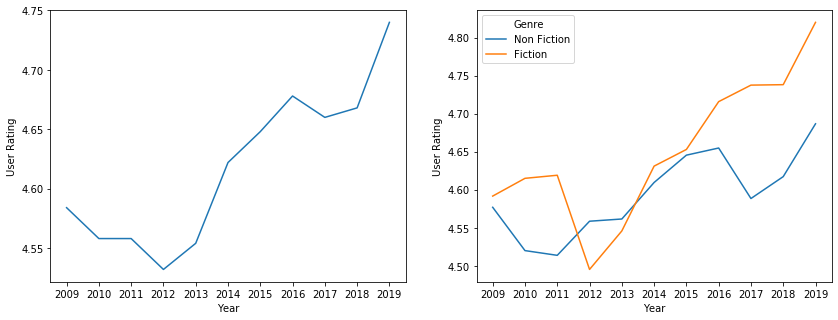

,User Rating,Rating Fiction,Rating Non Fiction
Year,,,
2009,4.584,4.592,4.577
2010,4.558,4.615,4.520
2011,4.558,4.619,4.514
2012,4.532,4.495,4.559
2013,4.554,4.546,4.562
2014,4.622,4.631,4.610
2015,4.648,4.653,4.645
2016,4.678,4.716,4.655
2017,4.660,4.737,4.588


In [16]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

rating = df.groupby('Year')['User Rating'].mean()
rating = rating.reset_index()

sns.lineplot(x='Year', y='User Rating', data=df, ci=None, markers=True, ax=ax[0])
ax[0].set_xticks(ticks=df['Year'].value_counts(ascending=True).index)

sns.lineplot(x='Year', y='User Rating', hue='Genre', data=df, ci=None, markers=True, ax=ax[1])
ax[1].set_xticks(ticks=df['Year'].value_counts(ascending=True).index)

plt.show()

time = pd.DataFrame(df.groupby('Year')['User Rating'].mean())
time_genre = pd.DataFrame(df.groupby(['Genre', 'Year'])['User Rating'].mean())

time['Rating Fiction'] = list(np.around(time_genre.loc['Fiction'].reset_index()['User Rating'], 3))
time['Rating Non Fiction'] = list(np.around(time_genre.loc['Non Fiction'].reset_index()['User Rating'], 3))
display(time)

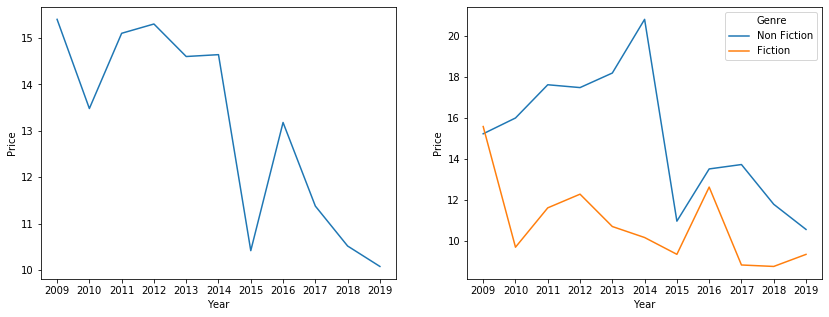

In [17]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

rating = df.groupby('Year')['Price'].mean()
rating = rating.reset_index()

sns.lineplot(x='Year', y='Price', data=df, ci=None, markers=True, ax=ax[0])
ax[0].set_xticks(ticks=df['Year'].value_counts(ascending=True).index)

sns.lineplot(x='Year', y='Price', hue='Genre', data=df, ci=None, markers=True, ax=ax[1])
ax[1].set_xticks(ticks=df['Year'].value_counts(ascending=True).index)

plt.show()

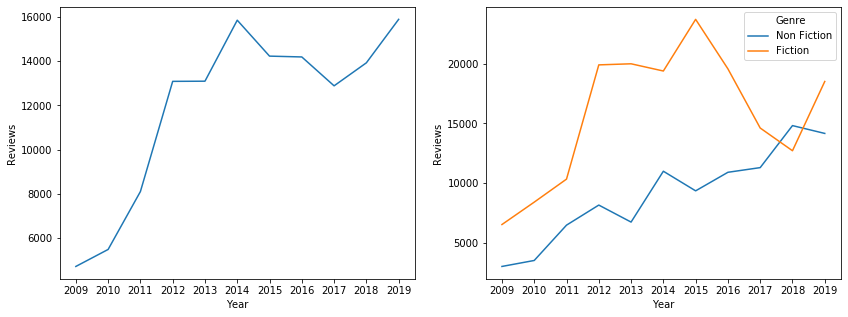

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

rating = df.groupby('Year')['Reviews'].mean()
rating = rating.reset_index()

sns.lineplot(x='Year', y='Reviews', data=df, ci=None, markers=True, ax=ax[0])
ax[0].set_xticks(ticks=df['Year'].value_counts(ascending=True).index)

sns.lineplot(x='Year', y='Reviews', hue='Genre', data=df, ci=None, markers=True, ax=ax[1])
ax[1].set_xticks(ticks=df['Year'].value_counts(ascending=True).index)

plt.show()

Voici, la matrice de corrélation de la dataframe.

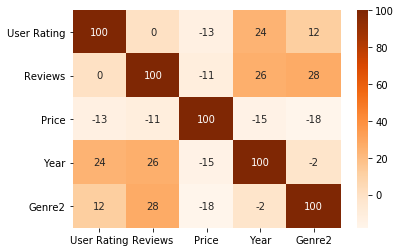

In [19]:
matrice_corr = df.corr().round(2) #on utilise round(2) pour avoir deux décimales après la virgule
sns.heatmap(data=(matrice_corr*100).astype(int), 
            #on multiple par 100 pour abtenir des corrélations en pourcentage, pour plus de simplicité
            annot=True, #on affiche les valeurs des corrélations dans la matrice de corrélation
            fmt='d', #permet d'éviter un affichage de certaines valeurs avec des exponentielles 
            cmap='Oranges'); #couleur de la matrice de corrélation

Nous regardons maintenant la PCA.

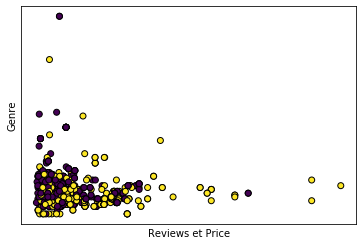

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

X = df[['Reviews','Price']].values 
y = df['Genre2'].values

x0_min, x0_max = X[:, 0].min(), X[:, 0].max()
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()

plt.figure()
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

plt.xlabel('Reviews et Price')
plt.ylabel('Genre')

plt.xticks(())
plt.yticks(())
plt.show()

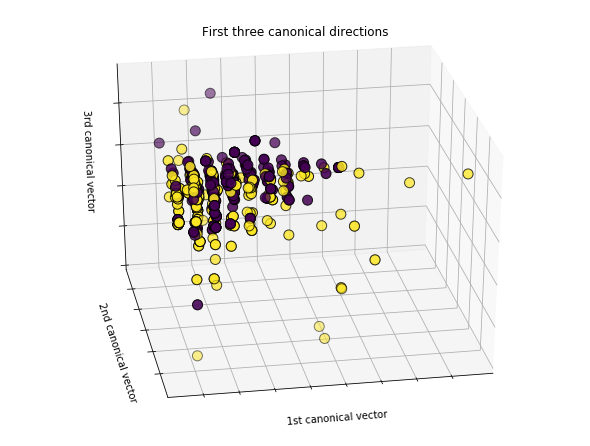

In [21]:
#On fait le graphique en 3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=100)
X = df[['Reviews','Price','User Rating']].values 
X = X - X.mean(0)
ax.scatter(X[:,2],X[:, 1], X[:, 0], c=y, edgecolor='k', s=100)
ax.set_title("First three canonical directions")
ax.set_xlabel("1st canonical vector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd canonical vector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd canonical vector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Regression logistique

Nous allons faire plusieurs régressions logistiques. 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KernelDensity

In [26]:
# On détermine les variables explicatives qui compose le X et la variable expliquée Y
# Cette régression logistique permet de tester le Genre en fonction des note, du nombre de vus, du prix et de l'année
X = df[['User Rating', 'Reviews','Price','Year']]
y = df['Genre']

In [27]:
# On choisit que 25% du dataframe sera pour le modele testé et 75% pour le training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [28]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

C:\Users\Johanne\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


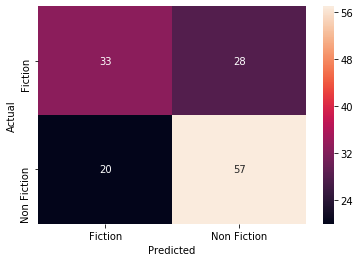

In [29]:
#Matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [30]:
# Calcul de l'accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.6521739130434783


In [31]:
# On teste le modèle pour des valeurs choisies. Ici, on applique sur 5 livres qu'on a choisit dans la base de données. 
new = {'User Rating': [4.6,4.6,4.5,3.3,4.9],
                  'Reviews': [23848,2137,8491,9372,5956],
                  'Price': [8,17,7,12,11],
                  'Year': [2016,2010,2014,2012,2019]
            }

df2 = pd.DataFrame(new,columns= ['User Rating', 'Reviews','Price','Year'])

On choisit les livres suivants pour tester le modèle : 
- A Man Called Ove: A Novel, par Fredrik Backman  --> Fiction
- Decision Points, par George W. Bush --> Non Fiction 
- Looking for Alaska, par John Green --> Fiction
- The Casual Vacancy, par J.K. Rowling --> Fiction 
- Unfreedom of the Press, par Mark R. Levin --> Non Fiction

In [36]:
y_pred=logistic_regression.predict(df2)
print (df2)
print("Voici les prédictions de notre régression :")
print (y_pred)

   User Rating  Reviews  Price  Year
0          4.6    23848      8  2016
1          4.6     2137     17  2010
2          4.5     8491      7  2014
3          3.3     9372     12  2012
4          4.9     5956     11  2019
Voici les prédictions de notre régression :
['Fiction' 'Non Fiction' 'Non Fiction' 'Non Fiction' 'Non Fiction']


In [37]:
X=pd.DataFrame(np.c_[df['User Rating'],df['Reviews'],df['Price']], columns = ['User Rating','Reviews','Price'])
Y = df['Genre2']
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(440, 3)
(110, 3)
(440,)
(110,)


In [38]:
# On entraîne le modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# On évalue le modèle d'entrainement
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('Le score R2 est {}'.format(r2))
print('\n')
 
# On évalue le modèle de test
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('Le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 0.4673076926274922
Le score R2 est 0.11313615304068203


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 0.46943056247654197
Le score R2 est 0.0994876254160032


In [40]:
# On créer une régression linéaire
regr = linear_model.LinearRegression()

# On entraine le modèle sur le jeu d'entrainement
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# On estime les valeurs sur les mêmes points du jeu d'entrainement 
y_opti = regr.predict(X_train)

In [42]:
# On fait des prédictions sur le jeu de données test
y_pred = regr.predict(X_test)

In [43]:
# On calcul la MSE sur notre y_opti
MSE_optim = mean_squared_error(Y_train, y_opti)
print('Mean squared error: %.2f'
      % MSE_optim)

Mean squared error: 0.22


In [44]:
# On calcul la MSE sur nos valeurs prédites
MSE_pred = mean_squared_error(Y_test, y_pred)
print('Mean squared error: %.2f'
      % MSE_pred)

Mean squared error: 0.22


On regarde la PCA pour cette régression logistique.

In [45]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [46]:
# On centre et réduit les données de X
dat = X-np.mean(X,axis=0)

# On définie la fonction PCA
pca = PCA(n_components=3)

# On applique la PCA sur les données
pca.fit(dat)
dat_new = pca.transform(dat)

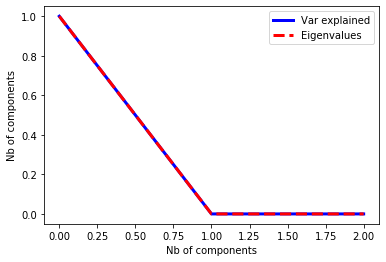

In [47]:
eigenvalues = pca.singular_values_**2
plt.plot(pca.explained_variance_ratio_,linewidth=3,c='blue',label='Var explained')
plt.plot(eigenvalues/np.sum(eigenvalues),'--',c='red',linewidth=3,label='Eigenvalues')
plt.xlabel('Nb of components')
plt.ylabel('Nb of components')
plt.legend()
plt.show()

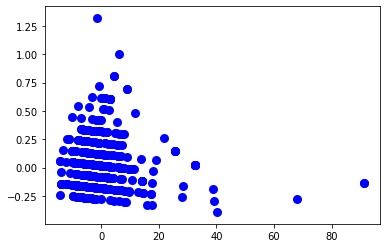

In [48]:
plt.scatter(dat_new[:,1],dat_new[:,2],linewidth=3,c='blue',label='Var explained')
plt.show()

On fait maintenant une régression logistique pour déterminer le nombre de vues en fonction de la note, du genre, du prix et de l'année. 

In [49]:
X = df[['User Rating', 'Genre2','Price','Year']]
y = df['Reviews']

In [50]:
# On découpe le jeu de données en deux parties : 25% du dataframe pour le modele testé et 75% pour le training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [51]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

C:\Users\Johanne\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Johanne\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [52]:
# On calcul l'accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.09420289855072464


In [53]:
# On teste le modele pour des valeurs choisies 
new = {'User Rating': [4.8,4.3,4.8,4.4,4.8],
                  'Genre2': [0,0,1,1,0],
                  'Price': [13,7,8,2,12],
                  'Year': [2009,2017,2011,2009,2019]
            }

df2 = pd.DataFrame(new,columns= ['User Rating', 'Genre2','Price','Year'])

On choisit les livres suivants pour tester le modèle :

- The Love Dare, par Stephen Kendrick --> 1655
- The Instant Pot Electric Pressure Cooker Cookbook: Easy Recipes for Fast & Healthy Meals, par Laurel Randolph --> 7368
- The Help, par Kathryn Stockett --> 13871
- The Girl with the Dragon Tattoo (Millennium Series), par Stieg Larsson --> 10559
- The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma, par Bessel van der Kolk M.D. --> 12361

In [54]:
# On prédit les données
y_pred=logistic_regression.predict(df2)
print (df2)
print("Voici les prédictions de notre régression :")
print (y_pred)

   User Rating  Genre2  Price  Year
0          4.8       0     13  2009
1          4.3       0      7  2017
2          4.8       1      8  2011
3          4.4       1      2  2009
4          4.8       0     12  2019
Voici les prédictions de notre régression :
[25001  5069 21834 14038 25001]


In [55]:
# On fait une régression du nombres de vues sur les notes, le genre et le prix des livres
X=pd.DataFrame(np.c_[df['User Rating'],df['Genre2'],df['Price']], columns = ['User Rating','Genre2','Price'])
Y = df['Reviews']
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(440, 3)
(110, 3)
(440,)
(110,)


In [56]:
# On entraine le modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# On évalue le modèle sur le jeu de données d'entrainement
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('L erreur quadratique moyenne est {}'.format(rmse))
print('Le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('Le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
L erreur quadratique moyenne est 11294.095933730447
Le score R2 est 0.08029815723701828


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 10932.745461485176
Le score R2 est 0.0934308303886241


In [58]:
# On fait une régression linéaire
regr = linear_model.LinearRegression()

# On entraine le modèle sur le jeu d'entrainement
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

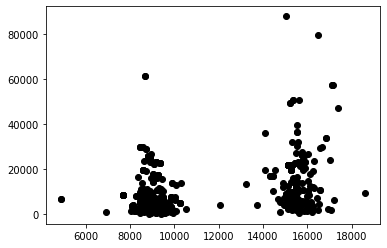

In [59]:
# On estime les valeurs du jeu d'entrainement 
y_opti = regr.predict(X_train)

plt.scatter(y_opti, Y_train,  color='black')
plt.show()

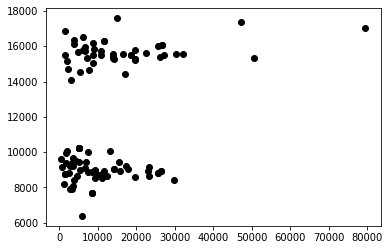

In [60]:
# On fait les prédictions sur sur la partie test de la dataframe
y_pred = regr.predict(X_test)

plt.scatter(Y_test, y_pred,  color='black')
plt.show()

In [61]:
# On calcul la MSE sur y_opti
MSE_optim = mean_squared_error(Y_train, y_opti)
print('Mean squared error: %.2f'
      % MSE_optim)

Mean squared error: 127556602.96


In [62]:
# On calcul le MSE sur les données prédites
MSE_pred = mean_squared_error(Y_test, y_pred)
print('Mean squared error: %.2f'
      % MSE_pred)

Mean squared error: 119524923.33


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=3)
print(len(X_train),len(X_test))

275 275


In [64]:
# On créer un régression linéaire
reg = linear_model.LinearRegression()

In [65]:
MSE = np.ones((3,1))*10**25
for dd in range(2,1,-1):
    X_train = X_train.iloc[:, 1:dd]
    X_test = X_test.iloc[:, 1:dd]
    
    reg.fit(X_train, Y_train)
    pred_test = reg.predict(X_test)
    MSE[dd] = mean_squared_error(Y_test, pred_test)

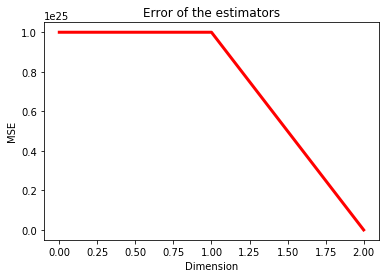

In [66]:
plt.plot(range(0,3), MSE[0:], color='red', linewidth=3)
plt.title('Error of the estimators')
plt.ylabel('MSE')
plt.xlabel('Dimension')
plt.show()

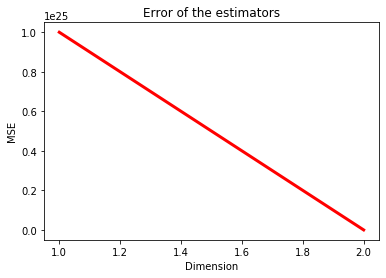

In [67]:
plt.plot(range(1,3), MSE[1:], color='red', linewidth=3)
plt.title('Error of the estimators')
plt.ylabel('MSE')
plt.xlabel('Dimension')
plt.show()

On sépare la table des livres en deux tables différentes : df_nonfiction et df_fiction
Ainsi on peut étudier les  livres de fiction d'une part et les livres qui ne sont pas de la fiction d'autre part.

On s'intéresse dans un premier temps, à la base de données comprenant tous les livres qui ne sont pas des fictions.

In [68]:
# On regarde les statistiques descriptives de la dataframe df_nonfiction, 
#      une dataframe qui ne contient que les livres qui ne sont pas de la fiction
df_nonfiction.describe()

,User Rating,Reviews,Price,Year,Genre2
count,310.000000,310.000000,310.000000,310.000000,310.0
mean,4.595161,9065.145161,14.841935,2014.058065,0.0
std,0.189555,8606.737629,12.043241,3.186214,0.0
min,4.000000,37.000000,0.000000,2009.000000,0.0
25%,4.500000,3235.000000,8.000000,2011.000000,0.0
50%,4.600000,6346.000000,12.000000,2014.000000,0.0
75%,4.700000,11124.250000,17.000000,2017.000000,0.0
max,4.900000,61133.000000,105.000000,2019.000000,0.0


In [69]:
# On fait une régression du prix des livres de non fiction en fonction des notes, du nombres de vies et de l'année
X = df_nonfiction[['User Rating', 'Reviews','Year']]
y = df_nonfiction['Price']

In [70]:
# On sépare en deux la dataframe : 25% du dataframe pour le modele testé et 75% pour le modèle d'entrainement
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [71]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

C:\Users\Johanne\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Johanne\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [72]:
# On calcul l'accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.08974358974358974


In [73]:
# On teste le modèle pour d'autres valeurs choisies 
new = {'User Rating': [4.6,4.7,4.5,4.9,4.6],
                  'Reviews': [3207,23308,22641,7861,1204],
                  'Year': [2009,2013,2015,2016,2010]
      }

df2 = pd.DataFrame(new,columns= ['User Rating', 'Reviews','Year'])

On test le modèle sur les livres suivants :
- The Five Dysfunctions of a Team: A Leadership Fable, par Patrick Lencioni --> 6
- The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book), par Don Miguel Ruiz --> 6
- The Life-Changing Magic of Tidying Up: The Japanese Art of Decluttering and Organizing, par Marie Kondō --> 11
- The Magnolia Story, par Chip Gaines --> 5
- The Road to Serfdom: Text and Documents--The Definitive Edition (The Collected Works of F. A. Hayek, Volume 2), par F. A. Hayek --> 14


In [74]:
# On prédit le modèle
y_pred=logistic_regression.predict(df2)
print (df2)
print("Voici les prédictions de notre régression :")
print (y_pred)

   User Rating  Reviews  Year
0          4.6     3207  2009
1          4.7    23308  2013
2          4.5    22641  2015
3          4.9     7861  2016
4          4.6     1204  2010
Voici les prédictions de notre régression :
[9 8 8 6 9]


In [75]:
X = pd.DataFrame(np.c_[df_nonfiction['User Rating'],df_nonfiction['Reviews'],df_nonfiction['Year']], columns = ['User Rating','Reviews','Year'])
Y = df_nonfiction['Price']
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(248, 3)
(62, 3)
(248,)
(62,)


In [76]:
# On entraine le modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
# On évalue le modèle d'entrainement
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('Le score R2 est {}'.format(r2))
print('\n')
 
# On évalue le modèle sur le jeu de données test 
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('Le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 12.203752804527278
Le score R2 est 0.042757788849903444


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 9.90056801472373
Le score R2 est 0.02478032983458356


In [78]:
# On crée une régression linéaire
regr = linear_model.LinearRegression()

# On entraine le modèle sur le jeu de données d'entrainement
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

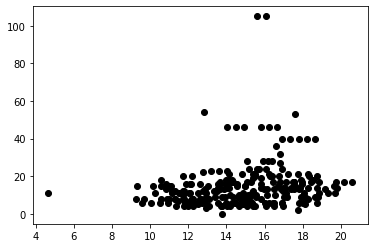

In [79]:
# On estime des valeurs pour ces mêmes points d'entrainement 
y_opti = regr.predict(X_train)

plt.scatter(y_opti, Y_train,  color='black')
plt.show()

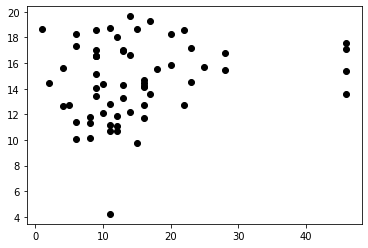

In [80]:
# On fait les prédictions sur le modèle de test
y_pred = regr.predict(X_test)

plt.scatter(Y_test, y_pred,  color='black')
plt.show()

In [81]:
# On calcul la MSE sur y_opti
MSE_optim = mean_squared_error(Y_train, y_opti)
print('Mean squared error: %.2f'
      % MSE_optim)

Mean squared error: 148.93


In [82]:
# On calcul le MSE sur les valeurs prédites
MSE_pred = mean_squared_error(Y_test, y_pred)
print('Mean squared error: %.2f'
      % MSE_pred)

Mean squared error: 98.02


On applique la PCA sur cette régression.

In [83]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [84]:
# On centre et on réduit les données 
dat = X-np.mean(X,axis=0)

# On définie la fonction PCA
pca = PCA(n_components=3)

# On applique la PCA aux données
pca.fit(dat)
dat_new = pca.transform(dat)

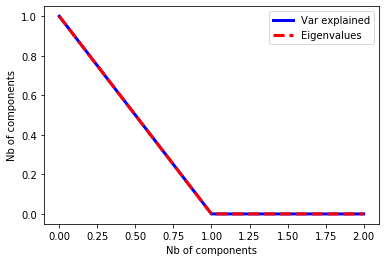

In [85]:
eigenvalues = pca.singular_values_**2
plt.plot(pca.explained_variance_ratio_,linewidth=3,c='blue',label='Var explained')
plt.plot(eigenvalues/np.sum(eigenvalues),'--',c='red',linewidth=3,label='Eigenvalues')
plt.xlabel('Nb of components')
plt.ylabel('Nb of components')
plt.legend()
plt.show()

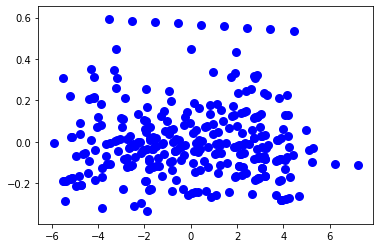

In [86]:
plt.scatter(dat_new[:,1],dat_new[:,2],linewidth=3,c='blue',label='Var explained')
plt.show()

On s'intéresse maintenant à la base de données ayant les livres de fiction.

In [87]:
df_fiction.describe()

,User Rating,Reviews,Price,Year,Genre2
count,240.000000,240.000000,240.00000,240.000000,240.0
mean,4.648333,15683.791667,10.85000,2013.925000,1.0
std,0.265123,13984.120890,8.57275,3.142801,0.0
min,3.300000,548.000000,0.00000,2009.000000,1.0
25%,4.600000,6162.500000,6.00000,2011.000000,1.0
50%,4.700000,10922.000000,9.00000,2014.000000,1.0
75%,4.800000,21834.000000,13.00000,2017.000000,1.0
max,4.900000,87841.000000,82.00000,2019.000000,1.0


In [88]:
# On fait une régression logistique des prix des livres de fictions en fonction des notes, du nombres de vues et de l'année
X = df_fiction[['User Rating', 'Reviews','Year']]
y = df_fiction['Price']

In [89]:
# On sépare la dataframe en deux : 25% du dataframe pour le modèle testé et 75% pour le modèle d'entrainement
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [90]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

C:\Users\Johanne\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Johanne\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [91]:
# On calcul l'accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.18333333333333332


In [92]:
# On teste le modèle pour des valeurs choisies
new = {'User Rating': [4.6,4.7,4.9,4.9,4.5],
                  'Reviews': [19720,1463,19546,8842,2586],
                  'Year': [2009,2011,2014,2019,2014]
      }

df2 = pd.DataFrame(new,columns= ['User Rating', 'Reviews','Year'])

On choisit les livres suivants :
- The Shack: Where Tragedy Confronts Eternity, par William P. Young --> 8
- The Throne of Fire (The Kane Chronicles, Book 2), par Rick Riordan --> 10
- The Very Hungry Caterpillar, par Eric Carle --> 5
- The Wonderful Things You Will Be, par Emily Winfield Martin --> 10
- Ultimate Sticker Book: Frozen: More Than 60 Reusable Full-Color Stickers, par DK --> 5

In [93]:
# On prédit les valeurs
y_pred=logistic_regression.predict(df2)
print (df2)
print("Voici les prédictions de notre régression :")
print (y_pred)

   User Rating  Reviews  Year
0          4.6    19720  2009
1          4.7     1463  2011
2          4.9    19546  2014
3          4.9     8842  2019
4          4.5     2586  2014
Voici les prédictions de notre régression :
[8 5 5 5 5]


In [94]:
X=pd.DataFrame(np.c_[df_fiction['User Rating'],df_fiction['Reviews'],df_fiction['Year']], columns = ['User Rating','Reviews','Year'])
Y = df_fiction['Price']
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(192, 3)
(48, 3)
(192,)
(48,)


In [95]:
# On entraine le modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
# On évalue le modèle d'entrainement
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('Le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('Le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 8.825447685465226
Le score R2 est 0.024822082784066946


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 6.612061227226312
Le score R2 est 0.05556751742380861


In [97]:
# On crée une régression linéaire
regr = linear_model.LinearRegression()

# On entraine le modèle d'entrainement
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

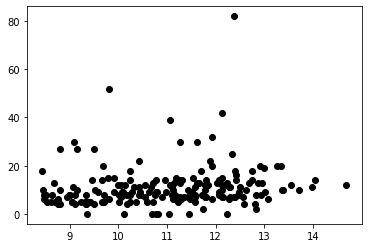

In [98]:
# On estime les valeurs de ces mêmes points d'entrainement 
y_opti = regr.predict(X_train)

plt.scatter(y_opti, Y_train,  color='black')
plt.show()

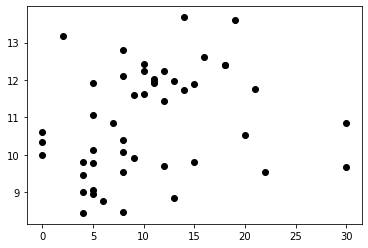

In [99]:
# On prédit sur le modèle test
y_pred = regr.predict(X_test)

plt.scatter(Y_test, y_pred,  color='black')
plt.show()

In [100]:
# On calcul la MSE sur y_opti
MSE_optim = mean_squared_error(Y_train, y_opti)
print('Mean squared error: %.2f'
      % MSE_optim)

Mean squared error: 77.89


In [101]:
# On calcul la MSE sur les valeurs prédites
MSE_pred = mean_squared_error(Y_test, y_pred)
print('Mean squared error: %.2f'
      % MSE_pred)

Mean squared error: 43.72


In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=3)
print(len(X_train),len(X_test))

120 120


In [103]:
# On fait une regression linéaire 
reg = linear_model.LinearRegression()

In [104]:
MSE = np.ones((3,1))*10**25
for dd in range(2,1,-1):
    X_train = X_train.iloc[:, 1:dd]
    X_test = X_test.iloc[:, 1:dd]
    
    reg.fit(X_train, Y_train)
    pred_test = reg.predict(X_test)
    MSE[dd] = mean_squared_error(Y_test, pred_test)

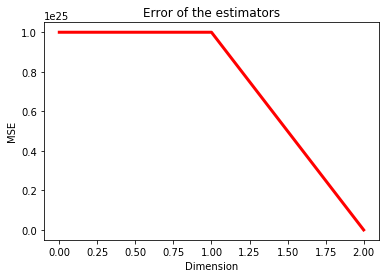

In [105]:
plt.plot(range(0,3), MSE[0:], color='red', linewidth=3)
plt.title('Error of the estimators')
plt.ylabel('MSE')
plt.xlabel('Dimension')
plt.show()

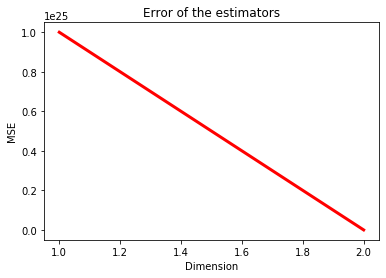

In [106]:
plt.plot(range(1,3), MSE[1:], color='red', linewidth=3)
plt.title('Error of the estimators')
plt.ylabel('MSE')
plt.xlabel('Dimension')
plt.show()

On applique la PCA sur cette régression logistique.

In [107]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [108]:
# On centre et on réduit les données
dat = X-np.mean(X,axis=0)

# On définie la fonction PCA
pca = PCA(n_components=3)

# On applique la PCA aux données
pca.fit(dat)
dat_new = pca.transform(dat)

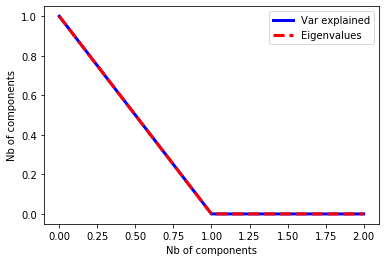

In [109]:
eigenvalues = pca.singular_values_**2
plt.plot(pca.explained_variance_ratio_,linewidth=3,c='blue',label='Var explained')
plt.plot(eigenvalues/np.sum(eigenvalues),'--',c='red',linewidth=3,label='Eigenvalues')
plt.xlabel('Nb of components')
plt.ylabel('Nb of components')
plt.legend()
plt.show()

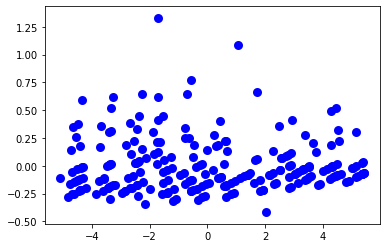

In [110]:
plt.scatter(dat_new[:,1],dat_new[:,2],linewidth=3,c='blue',label='Var explained')
plt.show()